In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/kyphosis.csv')


In [3]:
df.head()


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


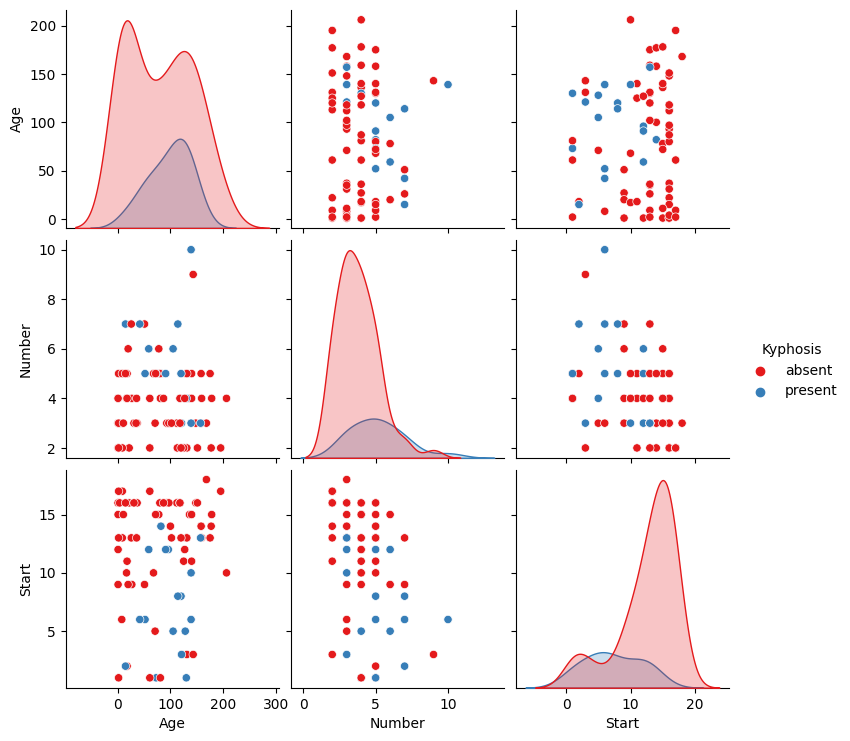

In [5]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')


In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)



In [9]:
from sklearn.tree import DecisionTreeClassifier


In [10]:
dtree = DecisionTreeClassifier()


In [11]:
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

In [12]:
predictions = dtree.predict(X_test)


In [13]:
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

      absent       0.82      0.74      0.78        19
     present       0.38      0.50      0.43         6

    accuracy                           0.68        25
   macro avg       0.60      0.62      0.60        25
weighted avg       0.72      0.68      0.69        25



In [15]:
from six import StringIO

from IPython.display import Image
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

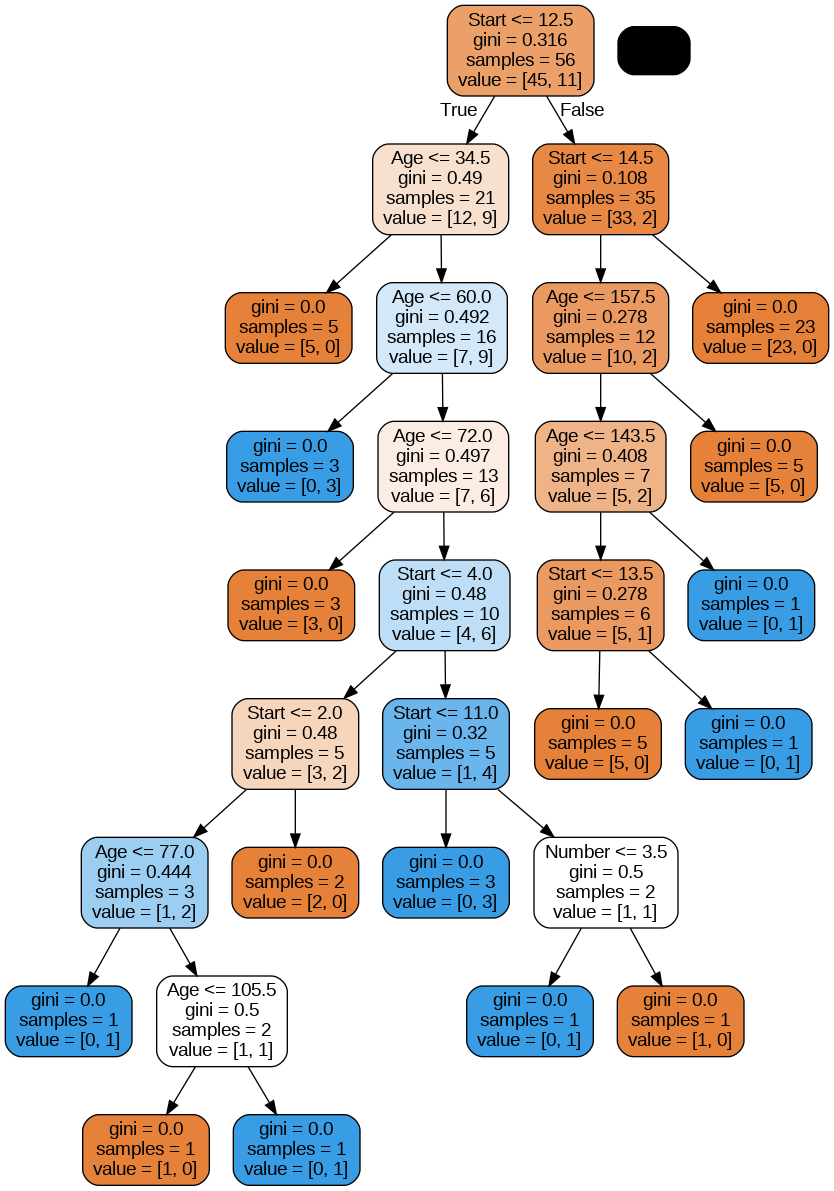

In [22]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [17]:
from sklearn.ensemble import RandomForestClassifier


In [18]:
rfc = RandomForestClassifier(n_estimators=200)


In [19]:
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [20]:
rfc_pred = rfc.predict(X_test)


In [21]:
print(classification_report(y_test, rfc_pred))


              precision    recall  f1-score   support

      absent       0.82      0.95      0.88        19
     present       0.67      0.33      0.44         6

    accuracy                           0.80        25
   macro avg       0.74      0.64      0.66        25
weighted avg       0.78      0.80      0.77        25

